In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (classification_report, confusion_matrix, 
                           accuracy_score, roc_curve, auc, roc_auc_score, precision_recall_curve)
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('default')
sns.set_palette("husl")

In [2]:
df = pd.read_csv('/home/sajjad/Desktop/42/ML/ML LAB/Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:

# Display dataset info
print("Columns:", df.columns.tolist())
print("\nDataset Information:")
print(f"Shape: {df.shape}")
print(f"Features: {len(df.columns) - 1}")  # exclude target
print(f"Classes: {df['Species'].unique().tolist()}")
print("\nClass distribution:")
print(df['Species'].value_counts().sort_index())

# Display basic statistics
print("\nBasic Statistics:")
print(df.describe())

Columns: ['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']

Dataset Information:
Shape: (150, 6)
Features: 5
Classes: ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

Class distribution:
Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

Basic Statistics:
               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000 

In [4]:
# Define mapping dictionary
species_mapping = {
    'Iris-setosa': 0,
    'Iris-versicolor': 1,
    'Iris-virginica': 2
}

# Replace directly in the dataframe
df['Species'] = df['Species'].map(species_mapping)

# Verify
print(df['Species'].unique())


[0 1 2]


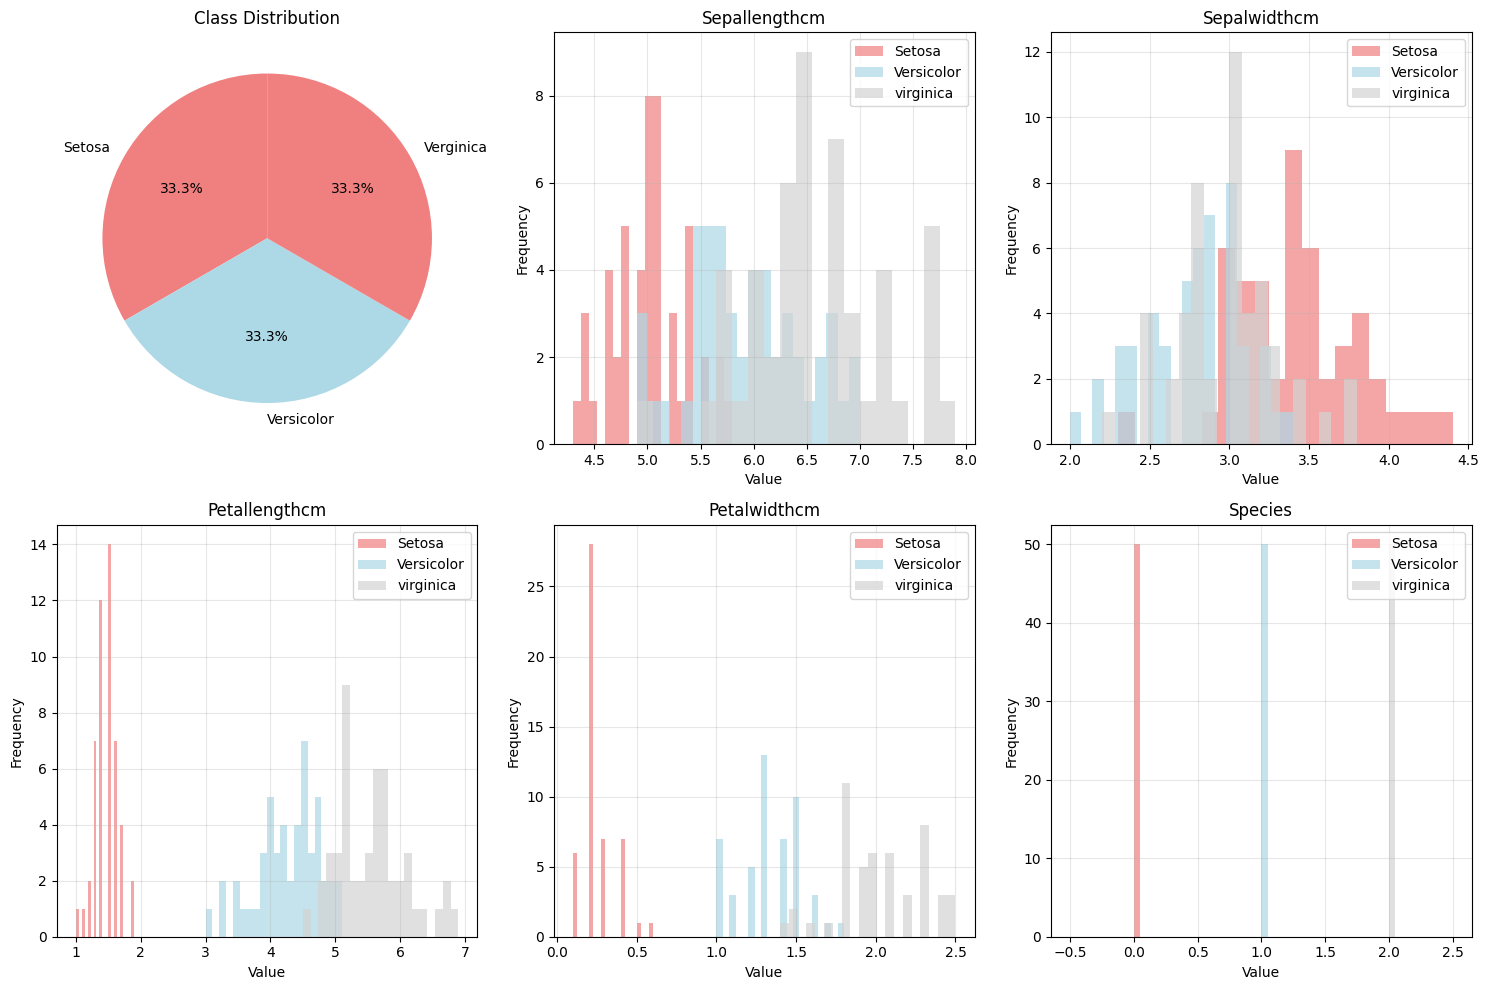

Iris setosa (0): 50 samples (33.3%)
Iris_versicolor (1): 50 samples (33.3%)
Iris_virginica (2): 50 samples (33.3%)


In [5]:
# Visualize class distribution and key features
plt.figure(figsize=(15, 10))

# Class distribution
plt.subplot(2, 3, 1)
class_counts = pd.Series(df['Species']).value_counts().sort_index()
colors = ['lightcoral', 'lightblue']
labels = ['Setosa', 'Versicolor', 'Verginica']
plt.pie(class_counts.values, labels=labels, autopct='%1.1f%%', 
        colors=colors, startangle=90)
plt.title('Class Distribution')

# Select key numerical features for visualization
key_features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']

for i, feature in enumerate(key_features, 2):
    plt.subplot(2, 3, i)
    
    # Plot distributions for each class using DataFrame
    Iris_setosa = df[df['Species'] == 0][feature]
    Iris_versicolor  = df[df['Species'] == 1][feature]
    Iris_virginica  = df[df['Species'] == 2][feature]
    
    plt.hist(Iris_setosa, alpha=0.7, label='Setosa', bins=20, color='lightcoral')
    plt.hist(Iris_versicolor, alpha=0.7, label='Versicolor', bins=20, color='lightblue')
    plt.hist(Iris_virginica, alpha=0.7, label='virginica', bins=20, color='lightgray')
    
    plt.title(f'{feature.replace("_", " ").title()}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Iris setosa (0): {class_counts[0]} samples ({class_counts[0]/len(df['Species'])*100:.1f}%)")
print(f"Iris_versicolor (1): {class_counts[1]} samples ({class_counts[1]/len(df['Species'])*100:.1f}%)")
print(f"Iris_virginica (2): {class_counts[0]} samples ({class_counts[0]/len(df['Species'])*100:.1f}%)")

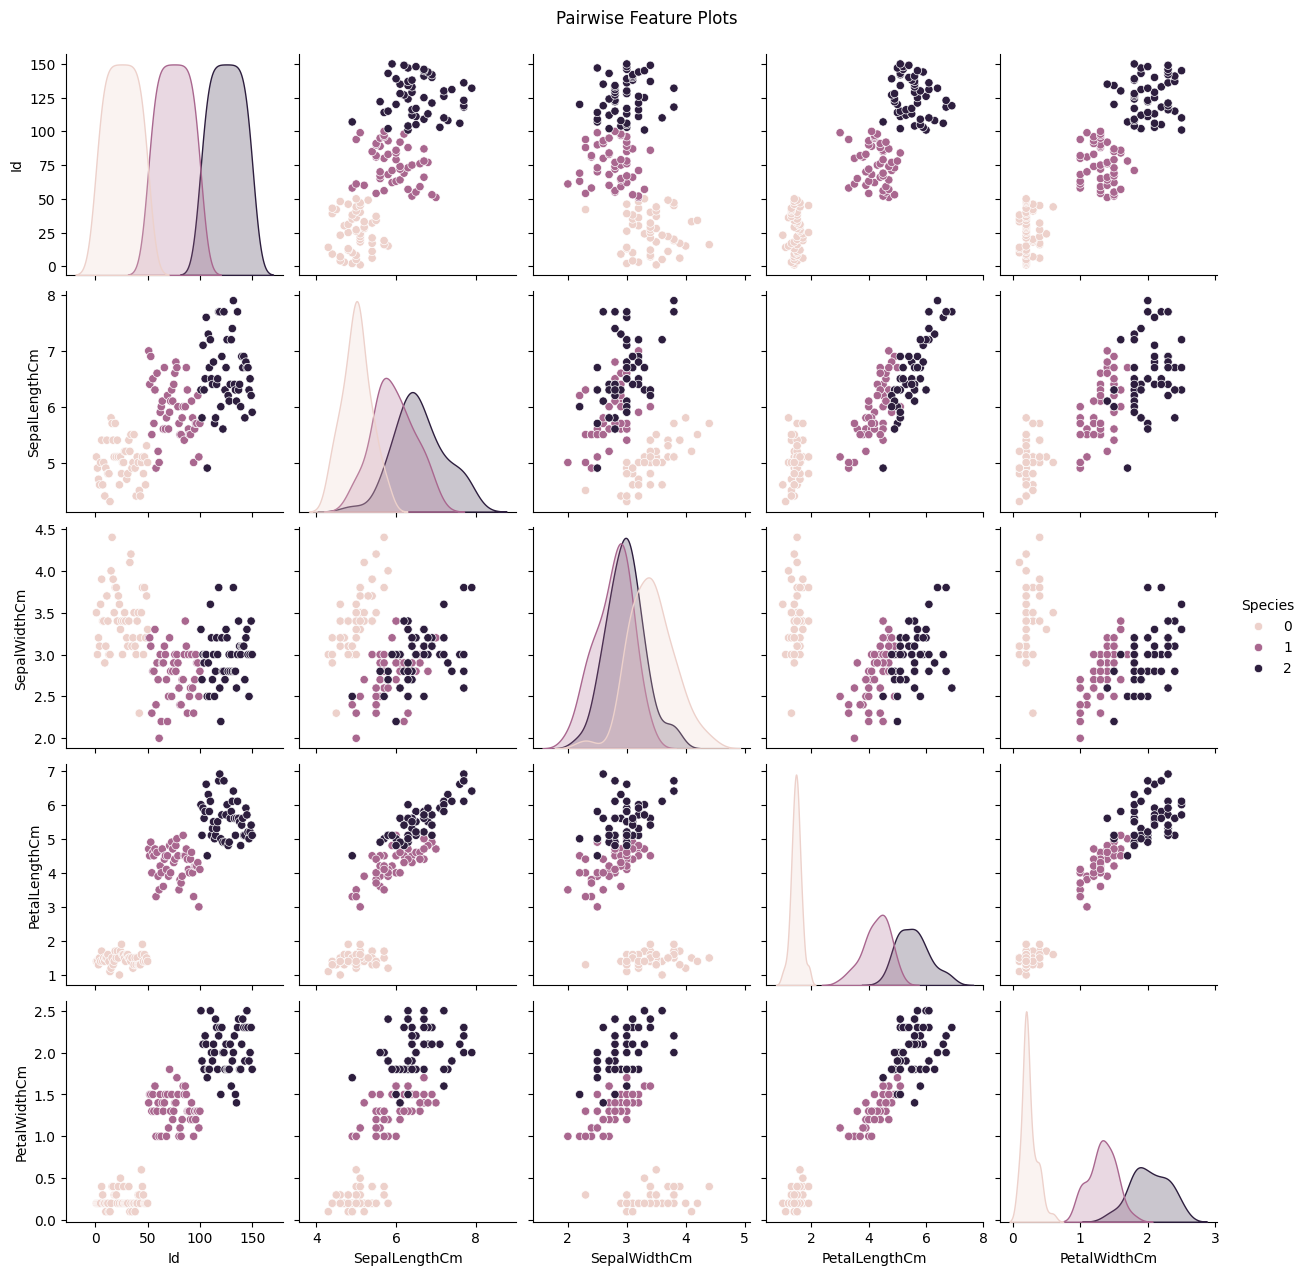

               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
count  150.000000     150.000000    150.000000     150.000000    150.000000   
mean    75.500000       5.843333      3.054000       3.758667      1.198667   
std     43.445368       0.828066      0.433594       1.764420      0.763161   
min      1.000000       4.300000      2.000000       1.000000      0.100000   
25%     38.250000       5.100000      2.800000       1.600000      0.300000   
50%     75.500000       5.800000      3.000000       4.350000      1.300000   
75%    112.750000       6.400000      3.300000       5.100000      1.800000   
max    150.000000       7.900000      4.400000       6.900000      2.500000   

          Species  
count  150.000000  
mean     1.000000  
std      0.819232  
min      0.000000  
25%      0.000000  
50%      1.000000  
75%      2.000000  
max      2.000000  
Species
0    50
1    50
2    50
Name: count, dtype: int64


In [6]:

sns.pairplot(df, hue='Species')
plt.suptitle("Pairwise Feature Plots", y=1.02)
plt.show()

print(df.describe())
print(df['Species'].value_counts())

In [7]:
# Check for missing values and data types
print("Missing values per column:")
print(df.isnull().sum())

print("\nTotal missing values:", df.isnull().sum().sum())

print("\nData types:")
print(df.dtypes.value_counts())

Missing values per column:
Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Total missing values: 0

Data types:
float64    4
int64      2
Name: count, dtype: int64


In [8]:
from sklearn.preprocessing import LabelEncoder
# Encode features using LabelEncoder
encoders = {}  # Dictionary to store encoder for each column

for col in df.columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le  # Save encoder for later use

X = df.drop('Species', axis=1)
y = df['Species']
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,0,8,14,4,1,0
1,1,6,9,4,1,0
2,2,4,11,3,1,0
3,3,3,10,5,1,0
4,4,7,15,4,1,0


In [9]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Feature scaling (important for logistic regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Original data shape: {X.shape}")
print(f"Training set: {X_train_scaled.shape}")
print(f"Test set: {X_test_scaled.shape}")
print(f"Training class distribution: {np.bincount(y_train)}")
print(f"Test class distribution: {np.bincount(y_test)}")

# Check scaling effect (using numpy arrays to avoid DataFrame issues)
print(f"\nBefore scaling - Mean: {X_train.values.mean():.3f}, Std: {X_train.values.std():.3f}")
print(f"After scaling - Mean: {X_train_scaled.mean():.3f}, Std: {X_train_scaled.std():.3f}")

# Show feature scaling statistics per feature
print(f"\nFeature scaling summary:")
print(f"Mean of scaled features (should be ~0): {X_train_scaled.mean(axis=0).mean():.6f}")
print(f"Std of scaled features (should be ~1): {X_train_scaled.std(axis=0).mean():.6f}")

Original data shape: (150, 5)
Training set: (120, 5)
Test set: (30, 5)
Training class distribution: [40 40 40]
Test class distribution: [10 10 10]

Before scaling - Mean: 25.358, Std: 32.273
After scaling - Mean: 0.000, Std: 1.000

Feature scaling summary:
Mean of scaled features (should be ~0): 0.000000
Std of scaled features (should be ~1): 1.000000


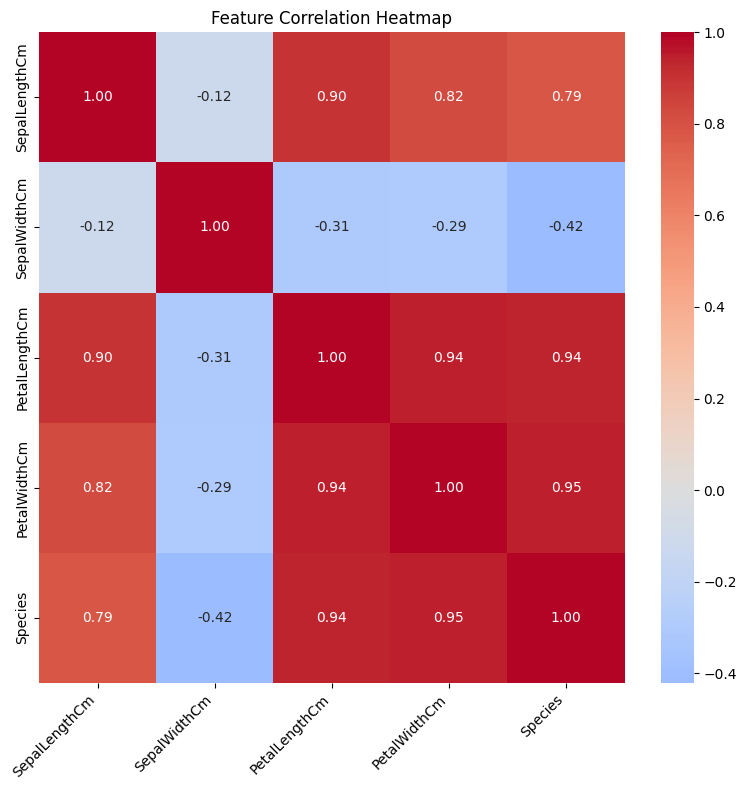

In [10]:
# Select subset of features for correlation analysis
selected_features = [
    'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species'
]


# Use only the DataFrame for correlation
corr = df[selected_features].corr()

plt.figure(figsize=(8, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Logistic Regression

In [11]:
from sklearn.linear_model import LogisticRegression
# Create and train Logistic Regression model
lr = LogisticRegression(random_state=42, max_iter=1000)
lr.fit(X_train_scaled, y_train)

# Make predictions
y_pred = lr.predict(X_test_scaled)
y_pred_proba = lr.predict_proba(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy:.4f}")

# Cross-validation score
cv_scores = cross_val_score(lr, X_train_scaled, y_train, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

# For multiclass logistic regression
roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr', average='macro')
print(f"ROC AUC Score (Multiclass): {roc_auc:.4f}")

Logistic Regression Accuracy: 1.0000
Cross-validation scores: [0.95833333 1.         1.         1.         1.        ]
Mean CV score: 0.9917 (+/- 0.0333)
ROC AUC Score (Multiclass): 1.0000


In [12]:
# Hyperparameter tuning using GridSearchCV
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Note: l1 penalty only works with liblinear and saga solvers
grid_search = GridSearchCV(
    LogisticRegression(random_state=42, max_iter=1000),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train_scaled, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Train the best model
best_lr = grid_search.best_estimator_
y_pred_best = best_lr.predict(X_test_scaled)
y_pred_proba_best = best_lr.predict_proba(X_test_scaled)

accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Best model test accuracy: {accuracy_best:.4f}")

# Compare models
print(f"\nModel Comparison:")
print(f"Default LR Accuracy: {accuracy:.4f}")
print(f"Tuned LR Accuracy: {accuracy_best:.4f}")
print(f"Improvement: {accuracy_best - accuracy:.4f}")

Best parameters: {'C': 10, 'penalty': 'l1', 'solver': 'saga'}
Best cross-validation score: 1.0
Best model test accuracy: 1.0000

Model Comparison:
Default LR Accuracy: 1.0000
Tuned LR Accuracy: 1.0000
Improvement: 0.0000


In [13]:
# Classification Report
print("Classification Report (Best Model):")
print(classification_report(y_test, y_pred_best, target_names=labels))

Classification Report (Best Model):
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Versicolor       1.00      1.00      1.00        10
   Verginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



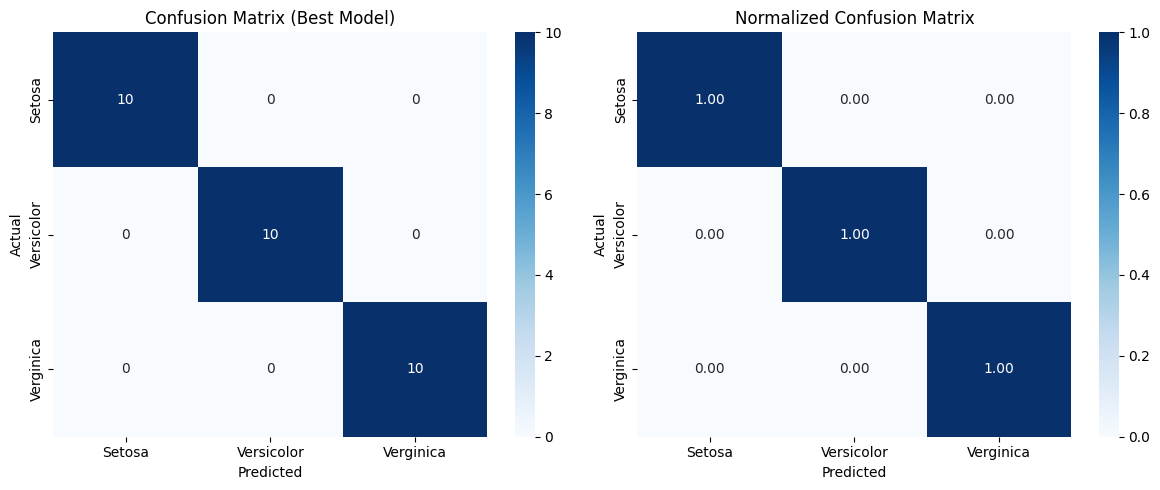

Confusion Matrix:
          Pred_0  Pred_1  Pred_2
Actual_0      10       0       0
Actual_1       0      10       0
Actual_2       0       0      10

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [14]:
# Confusion Matrix
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=labels, 
            yticklabels=labels)
plt.title('Confusion Matrix (Best Model)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 2, 2)
# Normalized confusion matrix
cm_normalized = confusion_matrix(y_test, y_pred_best, normalize='true')
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues',
            xticklabels=labels, 
            yticklabels=labels)
plt.title('Normalized Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix nicely
cm_df = pd.DataFrame(cm, 
                     index=[f"Actual_{cls}" for cls in np.unique(y_test)], 
                     columns=[f"Pred_{cls}" for cls in np.unique(y_test)])
print("Confusion Matrix:")
print(cm_df)

# Classification report (includes precision, recall, F1 for each class)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

## Naive Bayes

In [15]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler

In [16]:
# Create and train Multinomial Naive Bayes model
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

# Make predictions
y_pred = mnb.predict(X_test)
y_pred_proba = mnb.predict_proba(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Multinomial Naive Bayes Accuracy: {accuracy:.4f}")

# Cross-validation score
cv_scores = cross_val_score(mnb, X_train, y_train, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

Multinomial Naive Bayes Accuracy: 0.8333
Cross-validation scores: [0.66666667 0.79166667 0.70833333 0.625      0.875     ]
Mean CV score: 0.7333 (+/- 0.1795)


In [17]:
# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=labels))

Classification Report:
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Versicolor       0.86      0.60      0.71        10
   Verginica       0.69      0.90      0.78        10

    accuracy                           0.83        30
   macro avg       0.85      0.83      0.83        30
weighted avg       0.85      0.83      0.83        30



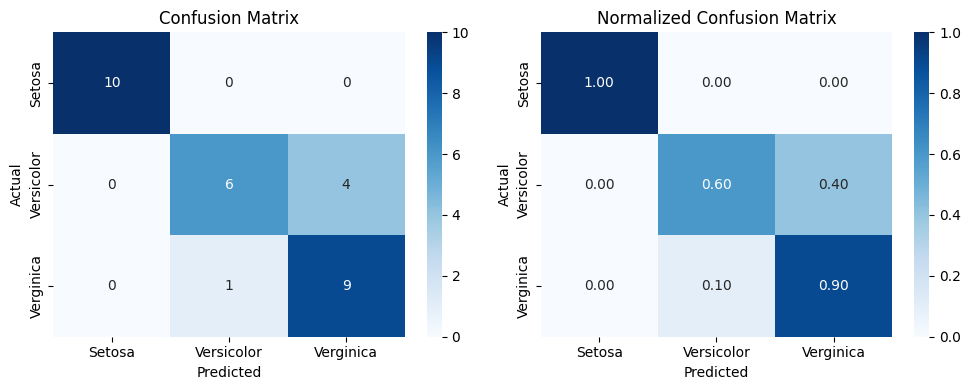

In [18]:
# Confusion Matrix
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=labels, 
            yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 2, 2)
# Normalized confusion matrix
cm_normalized = confusion_matrix(y_test, y_pred, normalize='true')
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues',
            xticklabels=labels, 
            yticklabels=labels)
plt.title('Normalized Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()


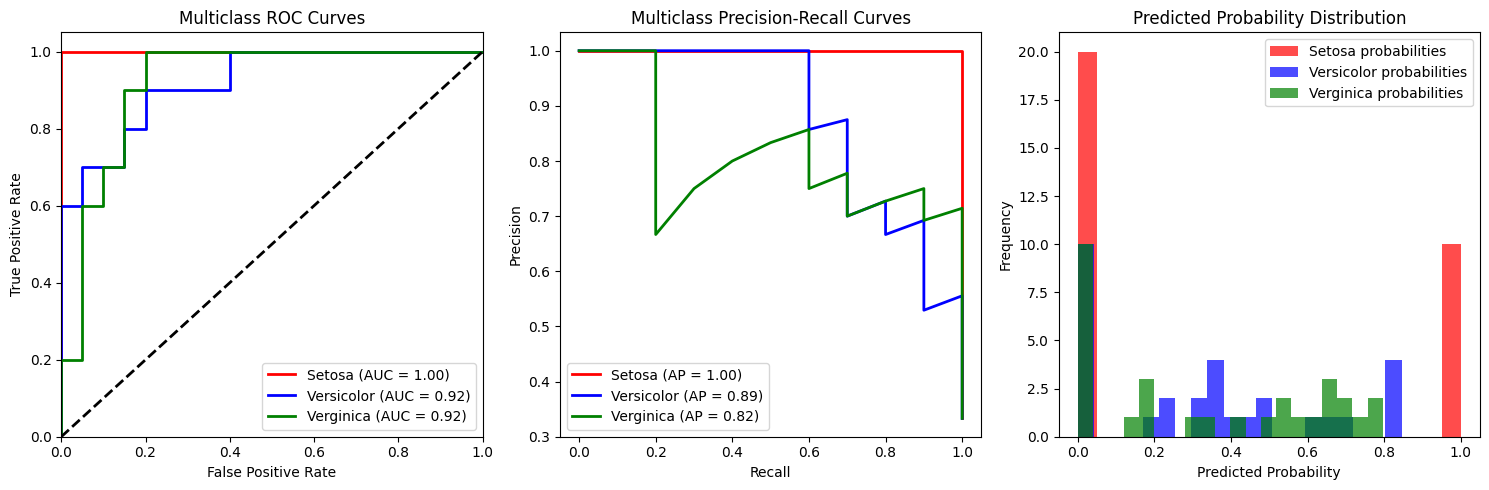

Macro-averaged ROC AUC Score: 0.9467
Weighted-averaged ROC AUC Score: 0.9467

Class-wise AUC Scores:
Setosa: AUC = 1.0000, AP = 1.0000
Versicolor: AUC = 0.9200, AP = 0.8850
Verginica: AUC = 0.9200, AP = 0.8210


In [19]:
# Multiclass ROC Curve and AUC
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score, average_precision_score

# Binarize the output for multiclass ROC
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_bin.shape[1]

plt.figure(figsize=(15, 5))

# ROC Curve for each class
plt.subplot(1, 3, 1)
colors = ['red', 'blue', 'green']
for i, color in zip(range(n_classes), colors):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=color, lw=2,
             label=f'{labels[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curves')
plt.legend(loc="lower right")

# Precision-Recall Curve for each class
plt.subplot(1, 3, 2)
for i, color in zip(range(n_classes), colors):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_pred_proba[:, i])
    avg_precision = average_precision_score(y_test_bin[:, i], y_pred_proba[:, i])
    plt.plot(recall, precision, color=color, lw=2,
             label=f'{labels[i]} (AP = {avg_precision:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Multiclass Precision-Recall Curves')
plt.legend(loc="lower left")

# Class probability distribution
plt.subplot(1, 3, 3)
for i, color in zip(range(n_classes), colors):
    plt.hist(y_pred_proba[:, i], bins=20, alpha=0.7, color=color, 
             label=f'{labels[i]} probabilities')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.title('Predicted Probability Distribution')
plt.legend()

plt.tight_layout()
plt.show()

# Calculate overall multiclass metrics
macro_roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr', average='macro')
weighted_roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr', average='weighted')

print(f"Macro-averaged ROC AUC Score: {macro_roc_auc:.4f}")
print(f"Weighted-averaged ROC AUC Score: {weighted_roc_auc:.4f}")

# Class-wise metrics
print("\nClass-wise AUC Scores:")
for i in range(n_classes):
    class_auc = roc_auc_score(y_test_bin[:, i], y_pred_proba[:, i])
    class_ap = average_precision_score(y_test_bin[:, i], y_pred_proba[:, i])
    print(f"{labels[i]}: AUC = {class_auc:.4f}, AP = {class_ap:.4f}")

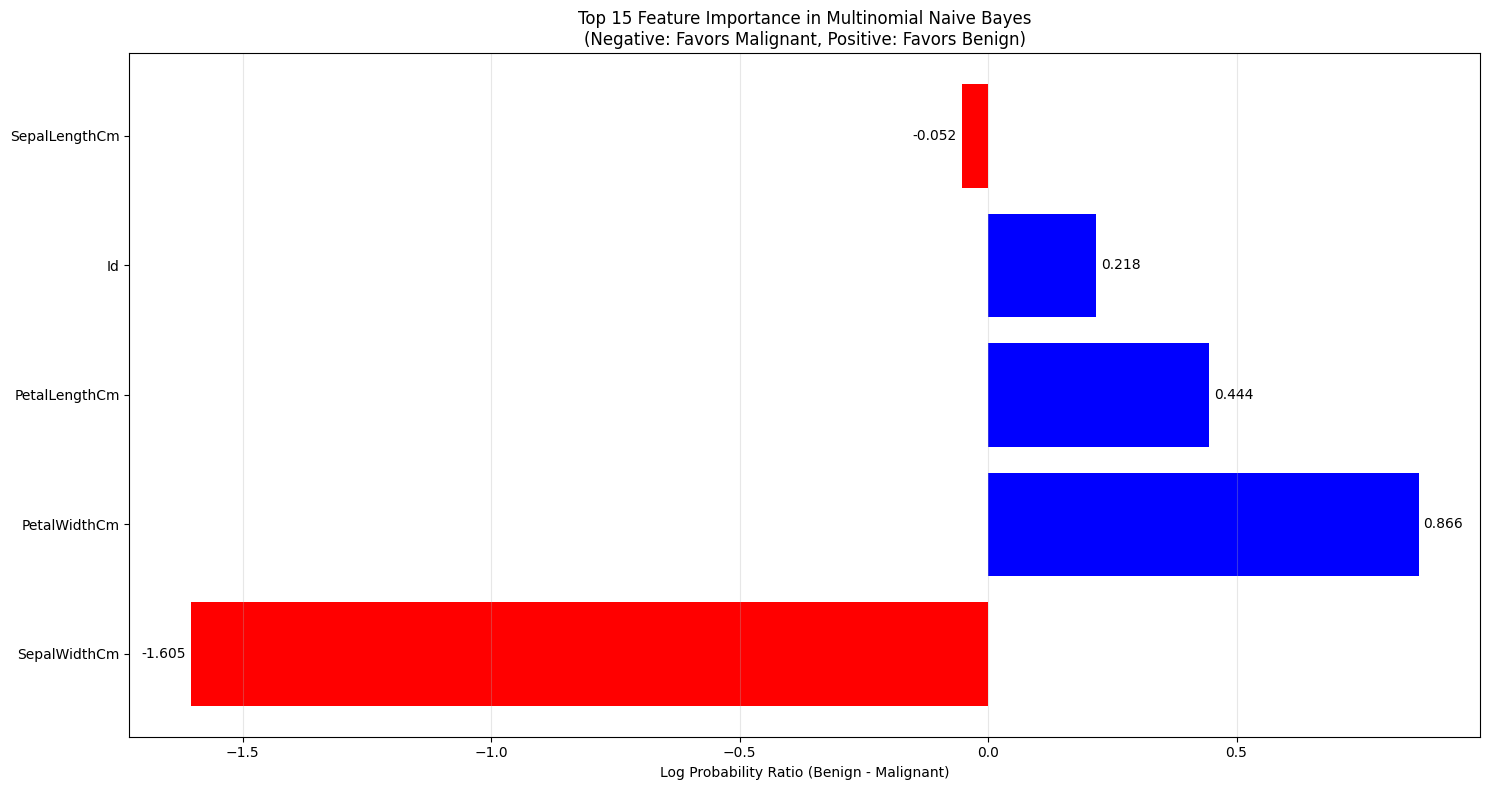

In [20]:
# Feature Importance (Log Probabilities)
plt.figure(figsize=(15, 8))

# Get log probabilities for each feature for each class
log_prob_ratio = mnb.feature_log_prob_[1] - mnb.feature_log_prob_[0]

# Sort features by importance
feature_importance = list(zip(df.columns, log_prob_ratio))
feature_importance.sort(key=lambda x: abs(x[1]), reverse=True)

# Plot top 15 most important features
top_features = feature_importance[:15]
features, importances = zip(*top_features)

plt.barh(range(len(features)), importances, color=['red' if imp < 0 else 'blue' for imp in importances])
plt.yticks(range(len(features)), features)
plt.xlabel('Log Probability Ratio (Benign - Malignant)')
plt.title('Top 15 Feature Importance in Multinomial Naive Bayes\n(Negative: Favors Malignant, Positive: Favors Benign)')
plt.grid(axis='x', alpha=0.3)

# Add value labels on bars
for i, (feature, importance) in enumerate(top_features):
    plt.text(importance + (0.01 if importance > 0 else -0.01), i, 
             f'{importance:.3f}', va='center', 
             ha='left' if importance > 0 else 'right')

plt.tight_layout()
plt.show()

## Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
# Create and train Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

print("🔹 Random Forest Model Trained Successfully!")
print(f"Number of trees: {rf_classifier.n_estimators}")
print(f"Number of features: {rf_classifier.n_features_in_}")
print(f"Feature names: {len(df.columns)} features")

🔹 Random Forest Model Trained Successfully!
Number of trees: 100
Number of features: 5
Feature names: 6 features


In [23]:
# Make predictions
y_pred = rf_classifier.predict(X_test)
y_pred_proba = rf_classifier.predict_proba(X_test)

# Calculate accuracy scores
train_accuracy = rf_classifier.score(X_train, y_train)
test_accuracy = rf_classifier.score(X_test, y_test)

print("🔹 Model Performance:")
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")

# Use proper multiclass ROC AUC calculation
macro_roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr', average='macro')
weighted_roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr', average='weighted')

print(f"ROC AUC Score (Macro): {macro_roc_auc:.4f}")
print(f"ROC AUC Score (Weighted): {weighted_roc_auc:.4f}")

# Cross-validation score
cv_scores = cross_val_score(rf_classifier, X_train, y_train, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

# Classification report
print("\n🔹 Classification Report:")
print(classification_report(y_test, y_pred, target_names=labels))

🔹 Model Performance:
Training Accuracy: 1.0000
Testing Accuracy: 1.0000
ROC AUC Score (Macro): 1.0000
ROC AUC Score (Weighted): 1.0000
Cross-validation scores: [0.95833333 1.         1.         1.         1.        ]
Mean CV score: 0.9917 (+/- 0.0333)

🔹 Classification Report:
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Versicolor       1.00      1.00      1.00        10
   Verginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Cross-validation scores: [0.95833333 1.         1.         1.         1.        ]
Mean CV score: 0.9917 (+/- 0.0333)

🔹 Classification Report:
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Versicolor       1.00      1.00      1.00        10
   Verginica       1.00      1.00  

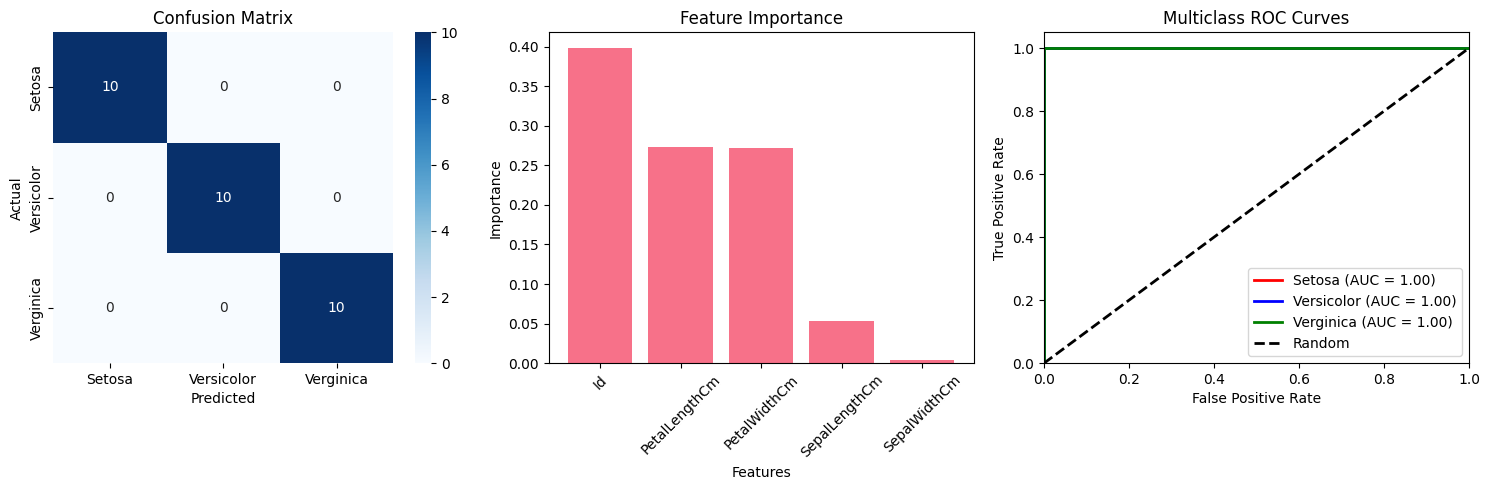

🔹 Feature Importance Ranking:
1. Id: 0.3980
2. PetalLengthCm: 0.2731
3. PetalWidthCm: 0.2720
4. SepalLengthCm: 0.0531
5. SepalWidthCm: 0.0038

🔹 Random Forest Model Summary:
Perfect Classification: True
Number of Trees: 100
Most Important Feature: Id
Least Important Feature: SepalWidthCm


In [24]:
# Confusion Matrix and Feature Importance
plt.figure(figsize=(15, 5))

# Confusion Matrix
plt.subplot(1, 3, 1)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')

# Feature Importance
plt.subplot(1, 3, 2)
feature_importance = rf_classifier.feature_importances_
feature_names = df.drop('Species', axis=1).columns
sorted_idx = np.argsort(feature_importance)[::-1]

plt.bar(range(len(feature_importance)), feature_importance[sorted_idx])
plt.xticks(range(len(feature_importance)), 
           [feature_names[i] for i in sorted_idx], rotation=45)
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')

# Class-wise ROC curves
plt.subplot(1, 3, 3)
from sklearn.preprocessing import label_binarize

# Binarize the output for multiclass ROC
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
n_classes = 3
colors = ['red', 'blue', 'green']

for i, color in zip(range(n_classes), colors):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=color, lw=2,
             label=f'{labels[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curves')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

# Print feature importance values
print("🔹 Feature Importance Ranking:")
for i, idx in enumerate(sorted_idx):
    print(f"{i+1}. {feature_names[idx]}: {feature_importance[idx]:.4f}")
    
# Overall model summary
print(f"\n🔹 Random Forest Model Summary:")
print(f"Perfect Classification: {test_accuracy == 1.0}")
print(f"Number of Trees: {rf_classifier.n_estimators}")
print(f"Most Important Feature: {feature_names[sorted_idx[0]]}")
print(f"Least Important Feature: {feature_names[sorted_idx[-1]]}")

## SVC

In [25]:
# Test different SVM kernels
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
svm_results = {}

print("Training SVM models with different kernels:")
print("=" * 50)

for kernel in kernels:
    print(f"Training SVM with {kernel} kernel...")
    
    # Create and train SVM model
    svm_model = SVC(kernel=kernel, random_state=42)
    svm_model.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred = svm_model.predict(X_test_scaled)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Store results
    svm_results[kernel] = {
        'model': svm_model,
        'predictions': y_pred,
        'accuracy': accuracy
    }
    
    print(f"  {kernel.upper()} kernel accuracy: {accuracy:.4f}")

print("=" * 50)

Training SVM models with different kernels:
Training SVM with linear kernel...
  LINEAR kernel accuracy: 1.0000
Training SVM with poly kernel...
  POLY kernel accuracy: 1.0000
Training SVM with rbf kernel...
  RBF kernel accuracy: 1.0000
Training SVM with sigmoid kernel...
  SIGMOID kernel accuracy: 0.9667


Best performing kernel: LINEAR


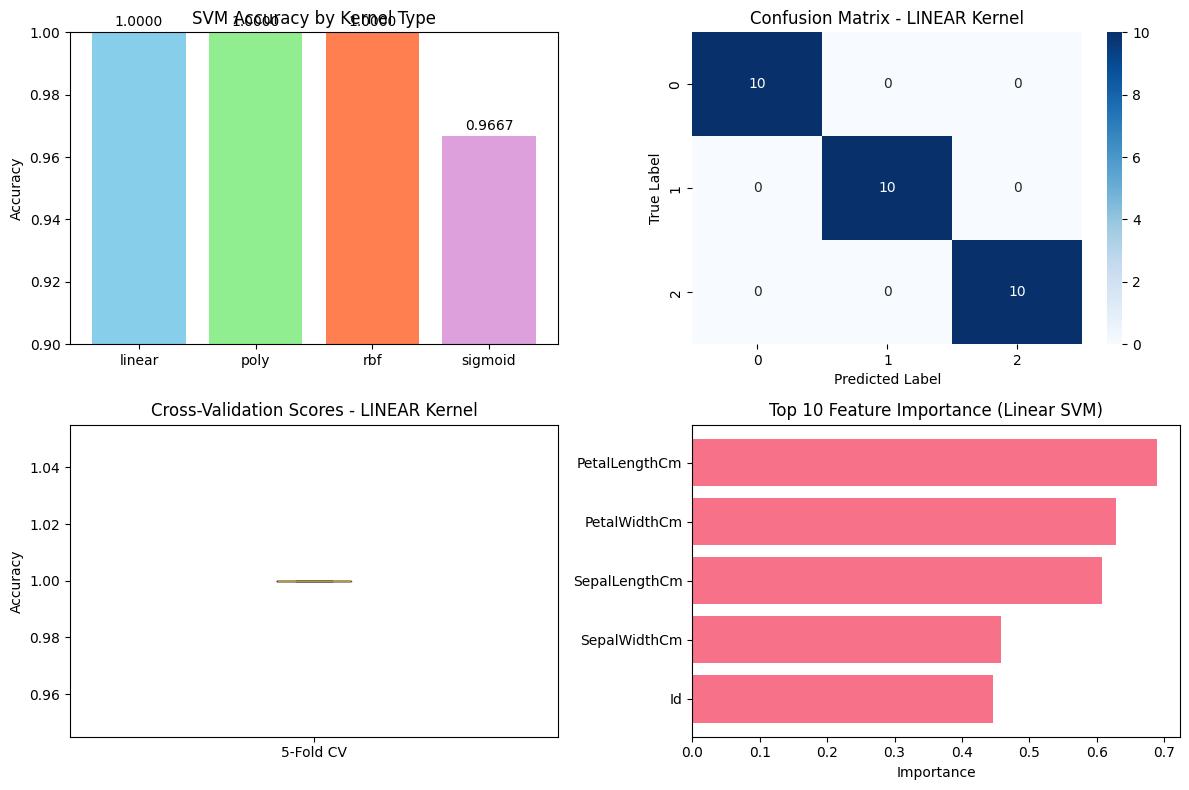

In [26]:
# Visualize kernel performance
plt.figure(figsize=(12, 8))

# Accuracy comparison
plt.subplot(2, 2, 1)
accuracies = [svm_results[kernel]['accuracy'] for kernel in kernels]
bars = plt.bar(kernels, accuracies, color=['skyblue', 'lightgreen', 'coral', 'plum'])
plt.title('SVM Accuracy by Kernel Type')
plt.ylabel('Accuracy')
plt.ylim(0.9, 1.0)
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.001, 
             f'{accuracies[i]:.4f}', ha='center', va='bottom')

# Confusion matrices for best performing kernels
best_kernel = max(svm_results.keys(), key=lambda k: svm_results[k]['accuracy'])
print(f"Best performing kernel: {best_kernel.upper()}")

# Plot confusion matrix for best kernel
plt.subplot(2, 2, 2)
cm = confusion_matrix(y_test, svm_results[best_kernel]['predictions'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=df['Species'].unique().tolist(), yticklabels=df['Species'].unique().tolist())
plt.title(f'Confusion Matrix - {best_kernel.upper()} Kernel')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

# Cross-validation scores for best kernel
plt.subplot(2, 2, 3)
cv_scores = cross_val_score(svm_results[best_kernel]['model'], X_train_scaled, y_train, cv=5)
plt.boxplot(cv_scores)
plt.title(f'Cross-Validation Scores - {best_kernel.upper()} Kernel')
plt.ylabel('Accuracy')
plt.xticks([1], ['5-Fold CV'])

# Feature importance (for linear kernel only)
plt.subplot(2, 2, 4)
if 'linear' in svm_results:
    feature_importance = np.abs(svm_results['linear']['model'].coef_[0])
    top_features_idx = np.argsort(feature_importance)[-10:]
    top_features = [df.columns[i] for i in top_features_idx]
    top_importance = feature_importance[top_features_idx]
    
    plt.barh(range(len(top_features)), top_importance)
    plt.yticks(range(len(top_features)), top_features)
    plt.title('Top 10 Feature Importance (Linear SVM)')
    plt.xlabel('Importance')
else:
    plt.text(0.5, 0.5, 'Feature importance\nonly available for\nlinear kernel', 
             ha='center', va='center', transform=plt.gca().transAxes)
    plt.title('Feature Importance')

plt.tight_layout()
plt.show()